# ACF of file with multiple time series

## Input parameters

In [1]:
#Name of the input file to analyze
#input_file = 'distOH_dftb_NEW.csv'
input_file = 'distOH_alain_NEW.csv'

# Indices of the specific time series you want to analyze
#selected_indices = [0, 8, 11] # DFTB A-BGLC1...C-BGLC2
#selected_indices = [1, 5, 10] # DFTB A-BGLC1...C-AMAN4
#selected_indices = [2, 3, 6] # DFTB A-AMAN6...C-AMAN4
selected_indices = [6, 7, 15]#, 26] # ALAIN A-BGLC1...C-BGLC2
#selected_indices = [1, 3, 14] # ALAIN A-BGLC1...C-AMAN4
#selected_indices = [2, 8, 10, 11, 17, 18, 19, 27, 32] # ALAIN A-AMAN6...C-AMAN4


## Main code

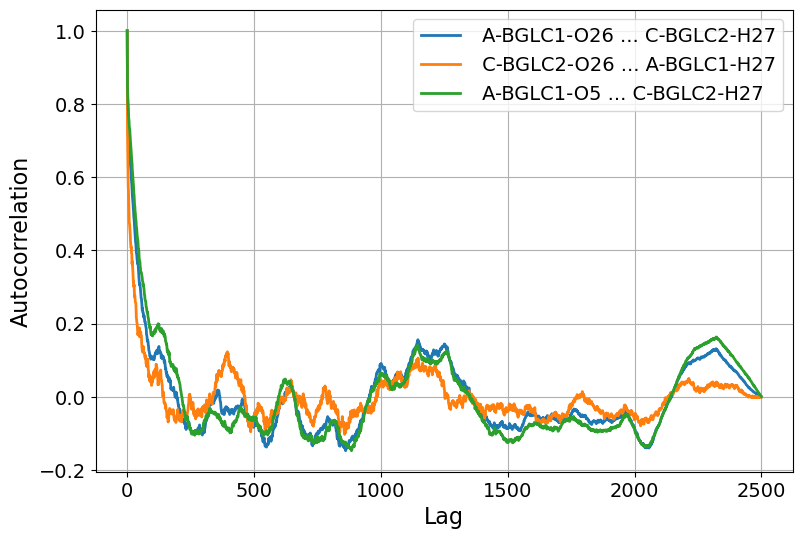

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from io import StringIO  # Import StringIO from the standard library
import numpy as np

# Read the entire file into a single string
with open(input_file, "r") as file:
#with open("distOH_alain_NEW.csv", "r") as file:
    file_content = file.read()

# Split the content into individual time series using '&'
time_series_list = file_content.split('&')

#legend_labels = []  # To store legend labels
legend_labels = time_series_list[0].split('\n')

# Store Fourier transform results
fourier_transforms = []

# Create a figure for all XY plots
plt.figure(figsize=(9, 6))

# Process each time series
for idx, time_series_data in enumerate(time_series_list[1:]):
    # If the time series is not empty (ignoring the last "&")
    if time_series_data.strip():
        # Check if the index is in the list of selected indices
        if idx in selected_indices:
            # Create a DataFrame from the time series data
            df = pd.read_csv(StringIO(time_series_data), delim_whitespace=True)

            # Extract the "Quakes" column as a pandas Series
            quake_data = df["Quakes"]

            # Calculate ACF
            acf_result = sm.tsa.acf(quake_data, nlags=5000)

            # Plot ACF as an XY plot with markers and lines
            #label = f"{legend_labels[-1]} - Time Series {idx + 1}" if legend_labels else f"Time Series {idx + 1}"
            label = f"{legend_labels[idx]}"
            plt.plot(range(len(acf_result)), acf_result, marker='', linestyle='-', label=label, linewidth=2)

            # Calculate Fourier transform
            fft_result = np.fft.fft(acf_result)
            fourier_transforms.append(fft_result)
            
# Customize the plot
#plt.title("Autocorrelation Function (ACF) - All Time Series")
plt.xlabel("Lag", fontsize=16)
plt.ylabel("Autocorrelation", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)

# Change the tick label size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


## Plot Fourier transforms of ACF

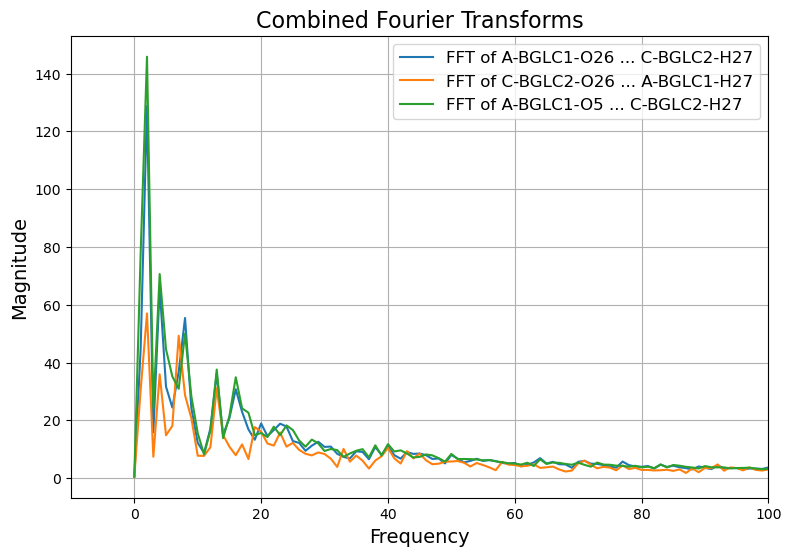

In [3]:
# Plot all FFTs in the same graph
plt.figure(figsize=(9, 6))

for idx, fft_result in enumerate(fourier_transforms):
    # Plot the magnitude of the Fourier transform
    label = f"FFT of {legend_labels[selected_indices[idx]].strip()}"
    plt.plot(np.abs(fft_result), label=label, marker='', linestyle='-', linewidth=1.5)

# Customize the plot
plt.title("Combined Fourier Transforms", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Magnitude", fontsize=14)
plt.legend(fontsize=12)
plt.xlim(-10, 100)  # Set the range of values on the X-axis (adjust as needed)
plt.grid(True)
plt.show()